In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *

In [3]:
PATH = 'data/distracteddriver/'

In [4]:
ls {PATH}

driver_imgs_list.csv*  sample_submission.csv*  test/  tmp/  train/


In [5]:
from fastai.plots import *

In [6]:
f_model = resnet34

In [7]:
label_csv = f'{PATH}driver_imgs_list.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [8]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    return ImageClassifierData.from_csv(PATH, 'train', label_csv, tfms=tfms,
                    suffix='', val_idxs=val_idxs, test_name='test')

In [9]:
print(val_idxs[:10])

[12922 17403  7648 15371  9213 19544 19569 13463 13008 18550]


In [10]:
sz=64

In [11]:
data = get_data(sz)

In [12]:
data = data.resize(int(sz*1.3), 'tmp')

In [13]:
learn = ConvLearner.pretrained(f_model, data)

 87%|████████▋ | 244/281 [00:10<00:01, 24.29it/s, loss=10.4]

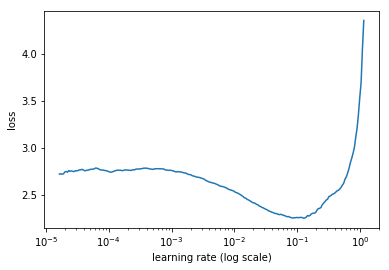

In [14]:
lrf=learn.lr_find()
learn.sched.plot()

In [15]:
lr = 0.08

In [16]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.498943   1.031818   0.685103  
    1      1.325683   0.830862   0.740856                   
    2      1.142982   0.74907    0.779438                   
    3      1.188404   0.739064   0.75223                    
    4      1.091389   0.626215   0.803078                   
    5      0.951558   0.509843   0.855932                    
    6      0.917434   0.499134   0.862623                    


[array([0.49913]), 0.8626226583407671]

In [17]:
lrs = np.array([lr/9,lr/3,lr])

In [18]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.645355   0.424448   0.852141  
    1      0.333756   0.191199   0.936218                    
    2      0.147823   0.093091   0.972346                    
    3      0.218843   0.228652   0.930642                    
    4      0.111586   0.084982   0.975468                    
    5      0.071636   0.052164   0.985504                     
    6      0.063705   0.048471   0.986842                     


[array([0.04847]), 0.9868421052631579]

In [19]:
learn.save(f'{sz}')

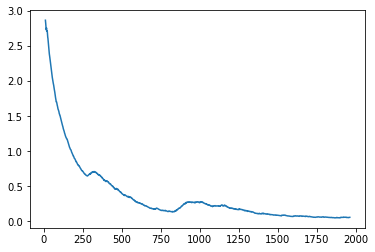

In [20]:
learn.sched.plot_loss()

In [21]:
sz=128

In [22]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.318552   0.98231    0.673506  
    1      1.1136     0.680484   0.778769                   
    2      0.935371   0.578697   0.824933                    
    3      0.983742   0.559589   0.822257                    
    4      0.893868   0.465106   0.857939                    
    5      0.801555   0.406155   0.881133                    
    6      0.783029   0.394448   0.884255                    


[array([0.39445]), 0.8842551293487957]

In [23]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

epoch      trn_loss   val_loss   accuracy                    
    0      0.183691   0.097461   0.971231  
    1      0.135295   0.082505   0.978814                    
    2      0.068454   0.054744   0.98595                      
    3      0.095574   0.121685   0.966994                     
    4      0.05185    0.043147   0.989518                     
    5      0.030516   0.03765    0.991302                     
    6      0.020168   0.033925   0.99264                      


In [24]:
sz=256

In [25]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.732721   0.448377   0.857939  
    1      0.562182   0.277877   0.919269                    
    2      0.469432   0.241993   0.930419                    
    3      0.502088   0.227013   0.936664                    
    4      0.424687   0.203657   0.940678                    
    5      0.374927   0.169957   0.952944                    
    6      0.358745   0.169725   0.952944                    


[array([0.16973]), 0.9529438001784122]

In [26]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

epoch      trn_loss   val_loss   accuracy                    
    0      0.116733   0.073914   0.981713  
    1      0.08861    0.072678   0.980152                     
    2      0.043117   0.046559   0.987511                     
    3      0.076499   0.074466   0.979037                     
    4      0.041884   0.03827    0.991302                     
    5      0.024879   0.027877   0.992417                     
    6      0.014058   0.028102   0.992417                     


In [27]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)

0.9924174843889384

## Confusion Matrix

[[509   0   0   0   0   1   0   0   0   1]
 [  0 472   0   0   0   0   0   0   0   0]
 [  0   1 455   0   0   0   0   0   0   0]
 [  2   1   0 475   0   0   0   0   0   0]
 [  0   0   0   4 443   0   0   0   0   0]
 [  5   1   1   0   0 453   1   0   0   1]
 [  0   1   0   0   0   0 485   0   0   0]
 [  1   0   0   0   0   0   0 383   0   0]
 [  0   0   0   2   0   0   0   0 354   7]
 [  3   0   0   0   0   0   0   0   1 421]]


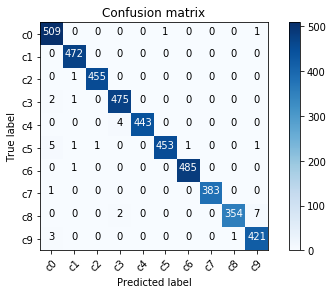

In [28]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)

## Visualization